*Import and view the img file and img.hdr file*

In [36]:
from Py6S import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osgeo import gdal
import spectral
import rasterio


In [2]:
# set the input file path
img_file = r"D:\SIH stuff\f100506t01p00r07rdn_b\f100506t01p00r07rdn_b_sc01_ort_img"
img = spectral.envi.open(r"D:\SIH stuff\f100506t01p00r07rdn_b\f100506t01p00r07rdn_b_sc01_ort_img.hdr", r"D:\SIH stuff\f100506t01p00r07rdn_b\f100506t01p00r07rdn_b_sc01_ort_img")

In [3]:
nrows, ncols, nbands = img.shape
print(f"Number of rows (height): {nrows}")
print(f"Number of columns (width): {ncols}")
print(f"Number of bands (bands): {nbands}")

Number of rows (height): 2950
Number of columns (width): 815
Number of bands (bands): 224


In [4]:
# all the wavelengths at which AVIRIS captures image.
wavelengths = [365.9298,375.5940,385.2625,394.9355,404.6129,414.2946,423.9808,433.6713,443.3662,453.0655,462.7692,472.4773,482.1898,491.9066,501.6279,511.3535,521.0836,530.8180,540.5568,550.3000,560.0477,569.7996,579.5560,589.3168,599.0819,608.8515,618.6254,628.4037,638.1865,647.9736,657.7651,667.5610,655.7923,665.5994,675.4012,685.1979,694.9894,704.7756,714.5566,724.3325,734.1031,743.8685,753.6287,763.3837,773.1335,782.8781,792.6174,802.3516,812.0805,821.8043,831.5228,841.2361,850.9442,860.6471,870.3448,880.0372,889.7245,899.4066,909.0834,918.7551,928.4214,938.0827,947.7387,957.3895,967.0351,976.6755,986.3106,995.9406,1005.565,1015.185,1024.799,1034.408,1044.012,1053.611,1063.204,1072.793,1082.376,1091.954,1101.526,1111.094,1120.656,1130.213,1139.765,1149.311,1158.853,1168.389,1177.920,1187.446,1196.966,1206.482,1215.992,1225.497,1234.996,1244.491,1253.980,1263.464,1253.373,1263.346,1273.318,1283.291,1293.262,1303.234,1313.206,1323.177,1333.148,1343.119,1353.089,1363.060,1373.030,1383.000,1392.969,1402.939,1412.908,1422.877,1432.845,1442.814,1452.782,1462.750,1472.718,1482.685,1492.652,1502.619,1512.586,1522.552,1532.518,1542.484,1552.450,1562.416,1572.381,1582.346,1592.311,1602.275,1612.240,1622.204,1632.167,1642.131,1652.094,1662.057,1672.020,1681.983,1691.945,1701.907,1711.869,1721.831,1731.792,1741.753,1751.714,1761.675,1771.635,1781.596,1791.556,1801.515,1811.475,1821.434,1831.393,1841.352,1851.310,1861.269,1871.227,1872.384,1866.864,1876.925,1886.985,1897.042,1907.096,1917.148,1927.198,1937.246,1947.292,1957.335,1967.375,1977.414,1987.450,1997.484,2007.515,2017.545,2027.572,2037.596,2047.619,2057.639,2067.656,2077.672,2087.685,2097.696,2107.704,2117.710,2127.714,2137.716,2147.715,2157.712,2167.707,2177.699,2187.689,2197.677,2207.662,2217.645,2227.626,2237.604,2247.581,2257.554,2267.526,2277.495,2287.462,2297.427,2307.389,2317.349,2327.307,2337.262,2347.216,2357.167,2367.115,2377.061,2387.005,2396.947,2406.886,2416.823,2426.758,2436.690,2446.620,2456.548,2466.473,2476.396,2486.317,2496.236]

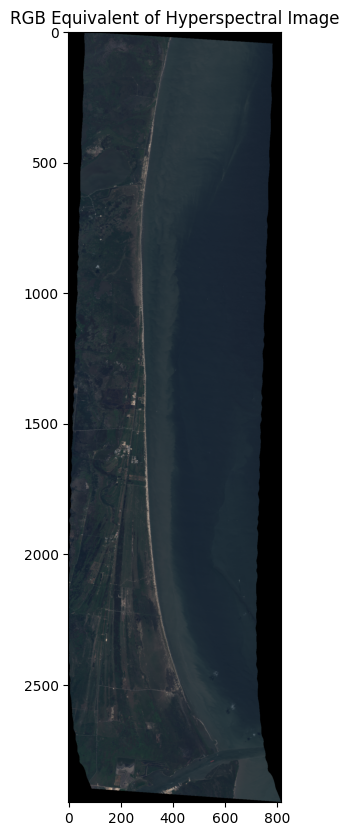

In [60]:
# raw input image

rgb_bands = [30, 19, 11]
rgb_img = spectral.get_rgb(img, rgb_bands)

plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)
plt.title('RGB Equivalent of Hyperspectral Image')
plt.show()

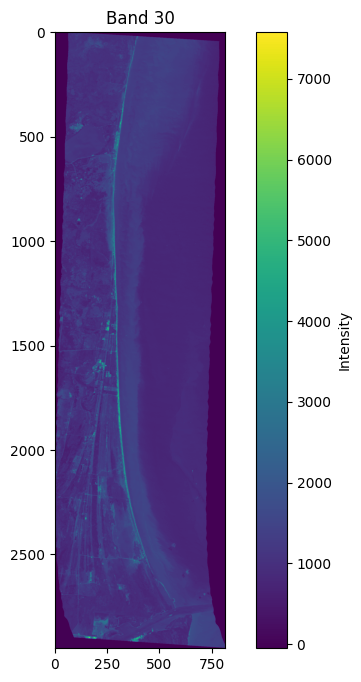

In [6]:
# view all bands individually if requires

dataset = gdal.Open(img_file)
if dataset is None:
    raise FileNotFoundError(f"Unable to open file {img_file}")
bands_count = dataset.RasterCount
band_number = 30
if band_number <= bands_count:
    band = dataset.GetRasterBand(band_number)
    band_data = band.ReadAsArray()
else:
    raise IndexError(f"Band number {band_number} out of range")
plt.figure(figsize=(8, 8))
plt.imshow(band_data)
plt.colorbar(label='Intensity')
plt.title(f'Band {band_number}')
plt.show()


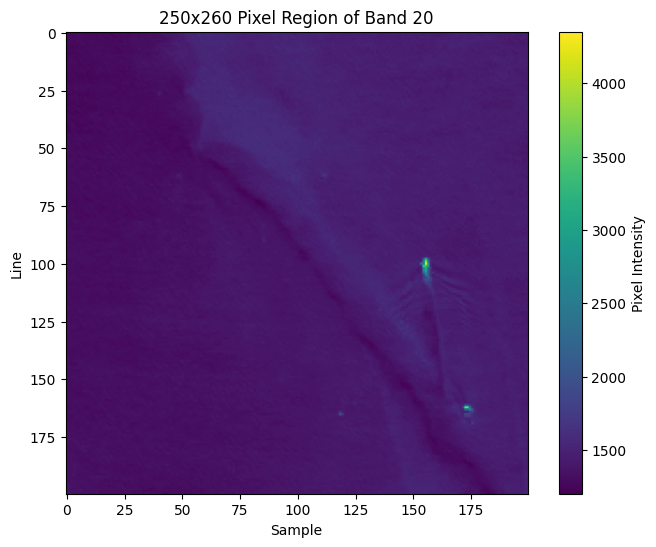

In [7]:
# view specific part of image at any band index

band_index = 19
band = dataset.GetRasterBand(band_index + 1)
band20_data = band.ReadAsArray()

start_line = 2000
end_line = start_line + 200
start_sample = 500
end_sample = start_sample + 200
region_of_interest = band20_data[start_line:end_line, start_sample:end_sample]

plt.figure(figsize=(8, 6))
plt.imshow(region_of_interest)
plt.colorbar(label='Pixel Intensity')
plt.title('250x260 Pixel Region of Band 20')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()

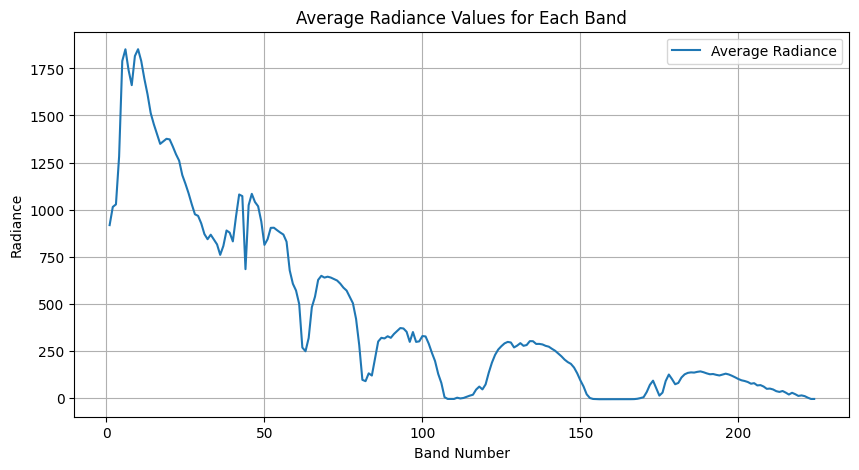

In [8]:
# compute the average radiance values for every band

img_data = img.load() 
rows, cols, bands = img_data.shape
average_radiance = []

for band in range(bands):
    band_data = img_data[:, :, band]
    mean_radiance = np.mean(band_data)
    average_radiance.append(mean_radiance)

band_numbers = range(1, bands + 1)
plt.figure(figsize=(10, 5))
plt.plot(band_numbers, average_radiance, label='Average Radiance')
plt.xlabel('Band Number')
plt.ylabel('Radiance')
plt.title('Average Radiance Values for Each Band')
plt.grid(True)
plt.legend()
plt.show()

*Radiance Information:*

In [9]:
# open the raw image and store the radiance data

radiance_file = r"D:\SIH stuff\f100506t01p00r07rdn_b\f100506t01p00r07rdn_b_sc01_ort_img"
hdr_file = r"D:\SIH stuff\f100506t01p00r07rdn_b\f100506t01p00r07rdn_b_sc01_ort_img.hdr"

radiance_data = spectral.open_image(hdr_file)

img_data = radiance_data.open_memmap(writeable=False) 

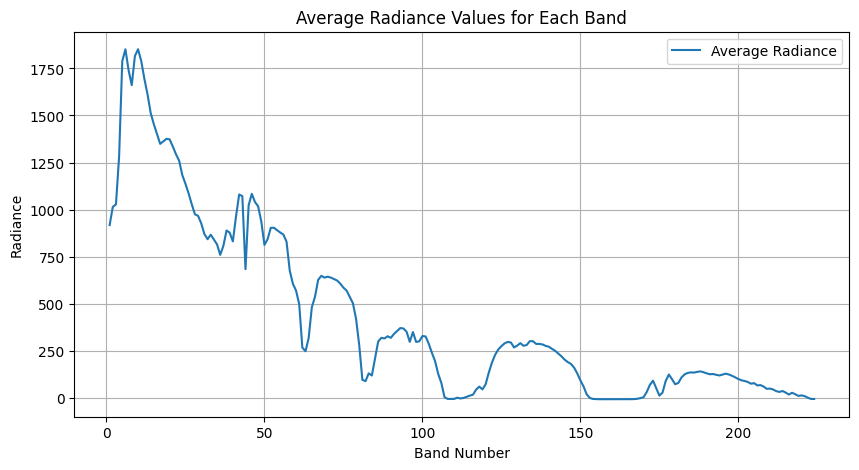

In [10]:
# view radiance value per band
# helps in identifying dead bands like band 155- 165

rows, cols, bands = img_data.shape
average_radiance = []

for band in range(bands):
    band_data = img_data[:, :, band]
    mean_radiance = np.mean(band_data)
    average_radiance.append(mean_radiance)

band_numbers = range(1, bands + 1)
plt.figure(figsize=(10, 5))
plt.plot(band_numbers, average_radiance, label='Average Radiance')
plt.xlabel('Band Number')
plt.ylabel('Radiance')
plt.title('Average Radiance Values for Each Band')
plt.grid(True)
plt.legend()
plt.show()

     Spectral Channel  Radiance
0                   1      1026
1                   2      1120
2                   3      1129
3                   4      1414
4                   5      1953
..                ...       ...
219               220         9
220               221        10
221               222         4
222               223         3
223               224         2

[224 rows x 2 columns]


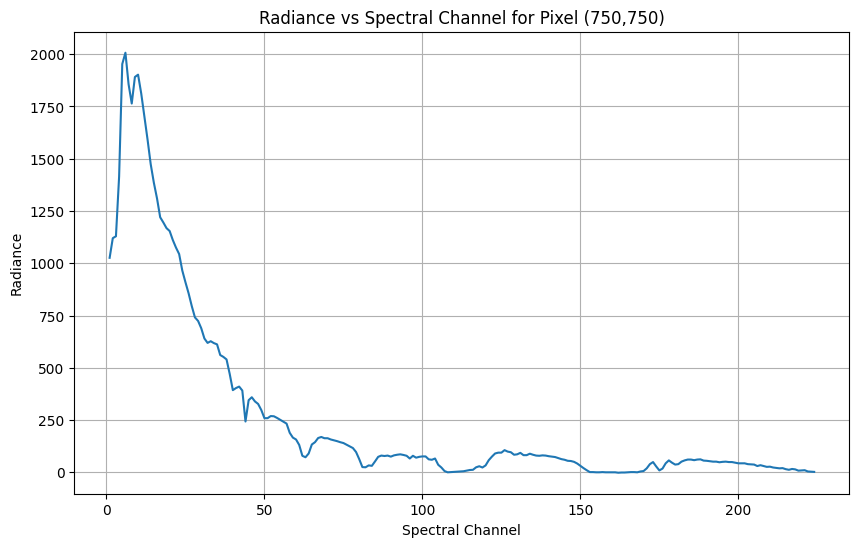

In [11]:
# pixel wise radiance data per band with graph

num_bands = dataset.RasterCount
x, y = 749, 749
spectral_data = []

for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

spectral_data = np.array(spectral_data)
df = pd.DataFrame({
    'Spectral Channel': range(1, num_bands + 1),
    'Radiance': spectral_data
})
print(df)
plt.figure(figsize=(10, 6))
plt.plot(df['Spectral Channel'], df['Radiance'])
plt.title('Radiance vs Spectral Channel for Pixel (750,750)')
plt.xlabel('Spectral Channel')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()

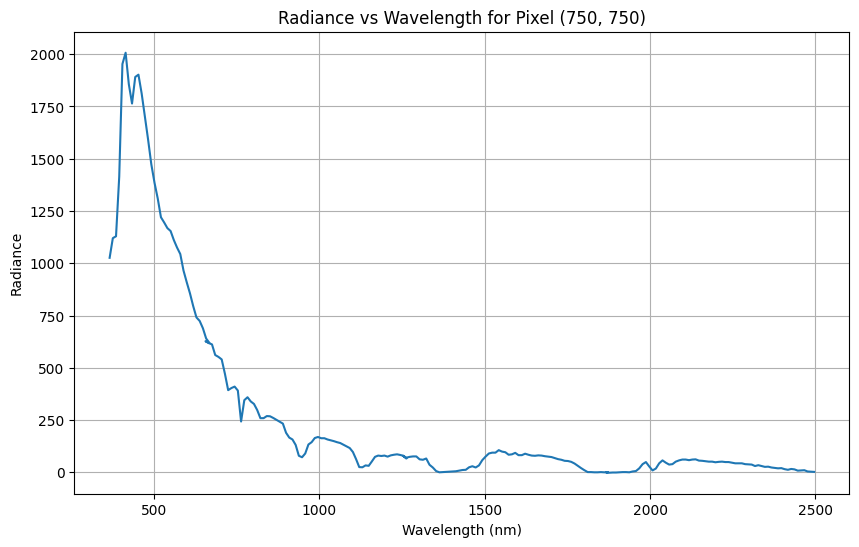

In [12]:
# pixel wise radiance data per wavelength with graph

plt.figure(figsize=(10, 6))
plt.plot(wavelengths, df['Radiance'])
plt.title('Radiance vs Wavelength for Pixel (750, 750)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()

*Start the atmospheric simulation using Py6S:*

In [13]:
# initialize the object of SixS class

s = SixS()

In [14]:
# ask the user to select the climate conditions

switcher_atmos = {
    "NoGaseousAbsorption": AtmosProfile.NoGaseousAbsorption,
    "Tropical": AtmosProfile.Tropical,
    "MidlatitudeSummer": AtmosProfile.MidlatitudeSummer,
    "MidlatitudeWinter": AtmosProfile.MidlatitudeWinter,
    "SubarcticSummer": AtmosProfile.SubarcticSummer,
    "SubarcticWinter": AtmosProfile.SubarcticWinter,
    "USStandard1962": AtmosProfile.USStandard1962
}
atmos_prof = input('Enter the atmospheric profile from the following options: NoGaseousAbsorption/Tropical/MidlatitudeSummer/MidlatitudeWinter/SubarcticSummer/SubarcticWinter/USStandard1962')
if atmos_prof in switcher_atmos:
    s.atmos_profile = AtmosProfile.PredefinedType(switcher_atmos[atmos_prof])
else:
    print("Invalid atmospheric profile entered.")

Enter the atmospheric profile from the following options: NoGaseousAbsorption/Tropical/MidlatitudeSummer/MidlatitudeWinter/SubarcticSummer/SubarcticWinter/USStandard1962 MidlatitudeSummer


In [15]:
# ask the user to select the aerosol conditions

switcher_aero = {"NoAerosols": AeroProfile.NoAerosols,
    "Continental": AeroProfile.Continental,
    "Maritime": AeroProfile.Maritime,
    "Urban": AeroProfile.Urban,
    "Desert": AeroProfile.Desert,
    "BiomassBurning": AeroProfile.BiomassBurning,
    "Stratospheric": AeroProfile.Stratospheric
}
aero_prof = input('Enter the aerosol profile from the following options: NoAerosols/Continental/Maritime/Urban/Desert/BiomassBurning/Stratospheric')
if aero_prof in switcher_aero:
    s.atmos_profile = AeroProfile.PredefinedType(switcher_aero[aero_prof])
else:
    print("Invalid aerosol profile entered.")

Enter the aerosol profile from the following options: NoAerosols/Continental/Maritime/Urban/Desert/BiomassBurning/Stratospheric Maritime


In [17]:
# set the visibility, usually 15km

visibility = float(input('Enter the visibility: '))
s.visibility = visibility

Enter the visibility:  15


In [18]:
# enter the geometric conditions which is very important for setting up Py6S radiative transfer model

latitude = float(input('Enter the latitude of the place in degrees: '))
longitude = float(input('Enter the longitude of the place in degrees: '))
flight_date = input('Enter the flight date in dd-mm-yyyy format: ')
day, month, year = flight_date.split('-')
day = int(day)
month = int(month)
year = int(year)

flight_time = input('Enter the flight time in hh:mm:ss format: ')
time_parts = list(map(int, flight_time.split(':')))
decimal_time = time_parts[0] + time_parts[1]/60 + time_parts[2]/3600

s.geometry = Geometry.Landsat_TM()

s.geometry.month = month
s.geometry.day = day
s.geometry.gmt_decimal_hour = decimal_time  
s.geometry.latitude = latitude
s.geometry.longitude = longitude

Enter the latitude of the place in degrees:  29.7596
Enter the longitude of the place in degrees:  -93.6474
Enter the flight date in dd-mm-yyyy format:  06-05-2010
Enter the flight time in hh:mm:ss format:  16:30:01


In [22]:
# calculate the astronomicla distance between earth and sun at the time and date of flight

isLeapYear = year % 4 == 0
monthSum = []
d = 0
if not isLeapYear:
    monthSum = [0, 0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334] 
    DoY = monthSum[month] + day
    d = 1 - 0.01672 * np.cos((2 * np.pi * (DoY - 3)) / 365)
else:
    monthSum = [0, 0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335] 
    DoY = monthSum[month] + day
    d = 1 - 0.01672 * np.cos((2 * np.pi * (DoY - 3)) / 366)
    


In [23]:
# set sensor related parameters

sensor_altitude = float(input('Enter the sensor altitude: '))
ground_elevation = float(input('Enter the ground elevation: '))
pixel_size = float(input('Enter the pixel size: '))

s.altitudes.set_target_custom_altitude(ground_elevation)
s.altitudes.set_sensor_custom_altitude(sensor_altitude)


Enter the sensor altitude:  20
Enter the ground elevation:  0
Enter the pixel size:  16.8


In [24]:
# since the dataset we considered is uniform throughout
# we can assume it as a Lambertian surface which means the reflection of light 
# is uniform in all directions

s.ground_reflectance = GroundReflectance.HomogeneousLambertian(0.6)

Enter the solar zenith angle:  26.64
Enter the solar azimuth angle:  114.11


Running for many angles - this may take a long time


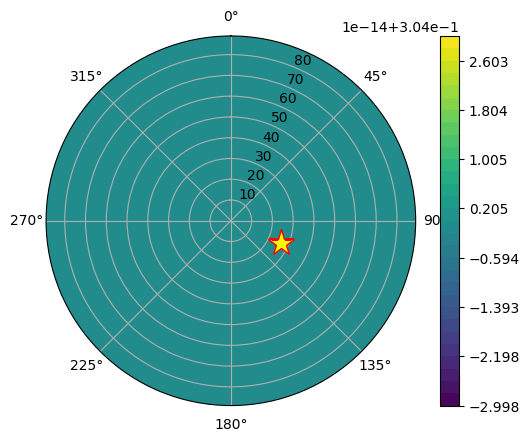

(<Figure size 640x480 with 2 Axes>, <PolarAxes: >)

In [25]:
# set the solar zenith and solar azomuth angles and
# plot the angles to visuialize the location of sun with respect to the dataset location

solar_zenith = float(input('Enter the solar zenith angle: '))
solar_azimuth = float(input('Enter the solar azimuth angle: '))
s.geometry.solar_a = solar_azimuth
s.geometry.solar_z = solar_zenith

SixSHelpers.Angles.run_and_plot_360(s, 'view', 'pixel_reflectance')

In [26]:
# compute the important parameters required for correction

atmos_params = {}
for wavelength in wavelengths:
    s.wavelength = Wavelength(wavelength/1000)
    s.run()
    atmos_params[wavelength/1000] = {
        'atmospheric_intrinsic_radiance': s.outputs.atmospheric_intrinsic_radiance,
        'direct_solar_irradiance': s.outputs.direct_solar_irradiance,  
        'diffuse_solar_irradiance': s.outputs.diffuse_solar_irradiance,
        'transmittance_up': s.outputs.transmittance_global_gas.upward,
        'transmittance_down': s.outputs.transmittance_global_gas.downward, 
    }
    

In [28]:
# some values of any parameter may turn out to be NaN which is undesired
# so we replace those values with the average of all other values for the same parameter

sums = {}
counts = {}

for wavelength, params in atmos_params.items():
    for param, value in params.items():
        if param not in sums:
            sums[param] = 0.0
            counts[param] = 0

        if not np.isnan(value):
            sums[param] += value
            counts[param] += 1

averages = {param: sums[param] / counts[param] for param in sums if counts[param] > 0}

for wavelength, params in atmos_params.items():
    for param in params:
        if np.isnan(params[param]):
            params[param] = averages[param]


# formula for correction

In [46]:
# Compute the corrected reflectance for all the radiance values
# based on the above formula

corrected_reflectance = np.zeros_like(img_data)

for index, wavelength in enumerate(wavelengths):
    band_data = img_data[: ,: , index]
    
    params = atmos_params[wavelength/1000]
    path_radiance = params['atmospheric_intrinsic_radiance']
    transmittance_up = params['transmittance_up']
    transmittance_down = params['transmittance_down']
    diffuse_solar_irradiance = params['diffuse_solar_irradiance']
    direct_solar_irradiance = params['direct_solar_irradiance']

    corrected_band = (np.pi * (band_data - path_radiance) * d**2) / (transmittance_up * (direct_solar_irradiance * np.cos(solar_zenith) * transmittance_down + diffuse_solar_irradiance))
    corrected_reflectance[:, :, index] = corrected_band

C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\2618478078.py:14: RuntimeWarning: invalid value encountered in cast
  corrected_reflectance[:, :, index] = corrected_band


In [47]:
corrected_reflectance.shape

(2950, 815, 224)

In [48]:
# change the dimensions so that it is compatible with rasterio 

corrected_reflectance = corrected_reflectance.transpose((2, 0, 1))
corrected_reflectance.shape

(224, 2950, 815)

In [50]:
# rasterio is used to store the corrected values in a .TIF file

output_path = r"D:\SIH stuff\f100506t01p00r07rdn_b\outputs\atmos_correct_1.tif"
corrected_reflectance = corrected_reflectance.astype(np.float32)

with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=corrected_reflectance.shape[1],
    width=corrected_reflectance.shape[2],
    count=corrected_reflectance.shape[0],
    dtype=corrected_reflectance.dtype,
    crs='EPSG:4326'
) as dst:
    for band_index in range(corrected_reflectance.shape[0]):
        dst.write(corrected_reflectance[band_index, :, :], band_index + 1)


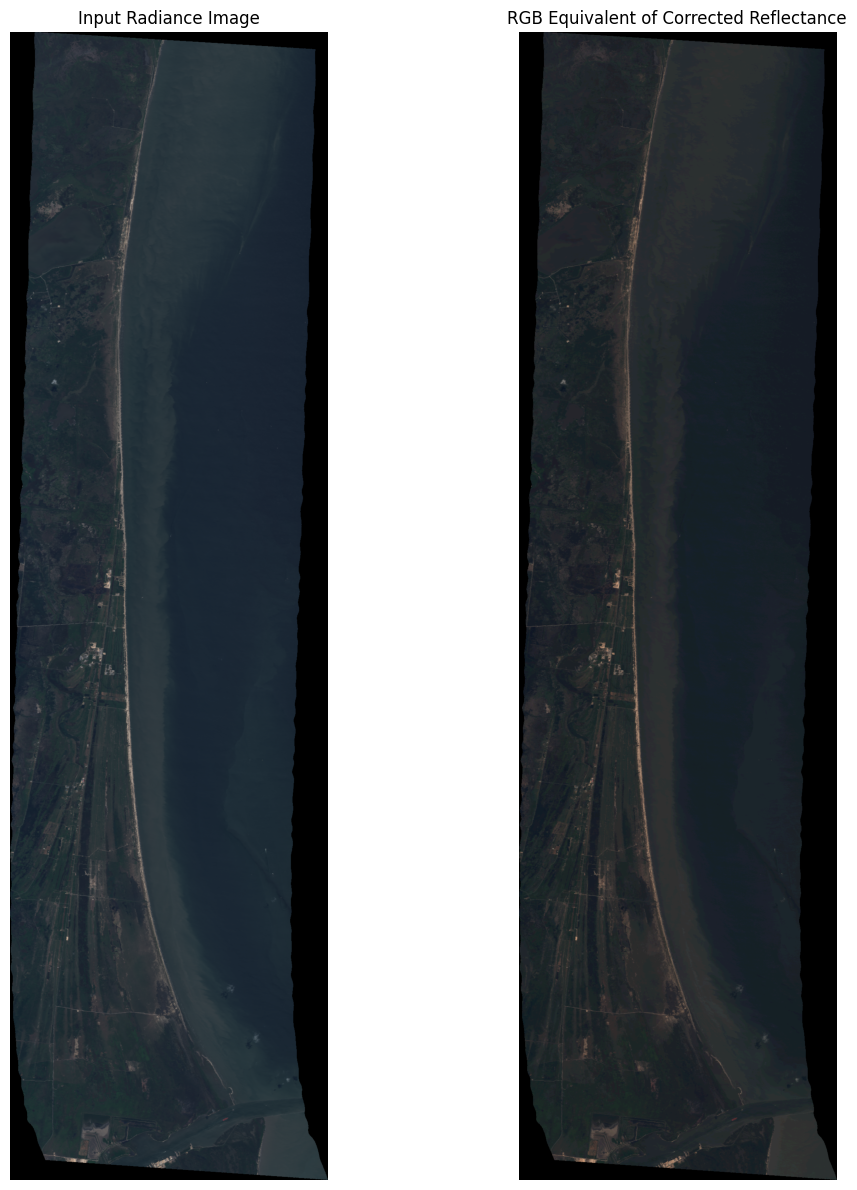

In [66]:
# view the output and image side by side to compare

with rasterio.open(output_path) as src:
    red_band = src.read(30)
    green_band = src.read(19)
    blue_band = src.read(11)

op_rgb_image = np.dstack((red_band, green_band, blue_band))

op_rgb_image = op_rgb_image.astype(np.float32)
op_rgb_image = (op_rgb_image - op_rgb_image.min()) / (op_rgb_image.max() - op_rgb_image.min())

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Input Radiance Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(op_rgb_image)
plt.title("RGB Equivalent of Corrected Reflectance")
plt.axis('off')

plt.tight_layout()
plt.show()
